In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import category_encoders as ce

from mpl_toolkits.mplot3d import *
from regressors import stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

In [35]:
df = pd.read_csv('diabe_india.csv')
df.shape

(767, 9)

In [36]:
df.columns =['preg','plas','pres','skin','test','mass','pedi','age','class']
df_02 = df.copy()
df_02.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [37]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


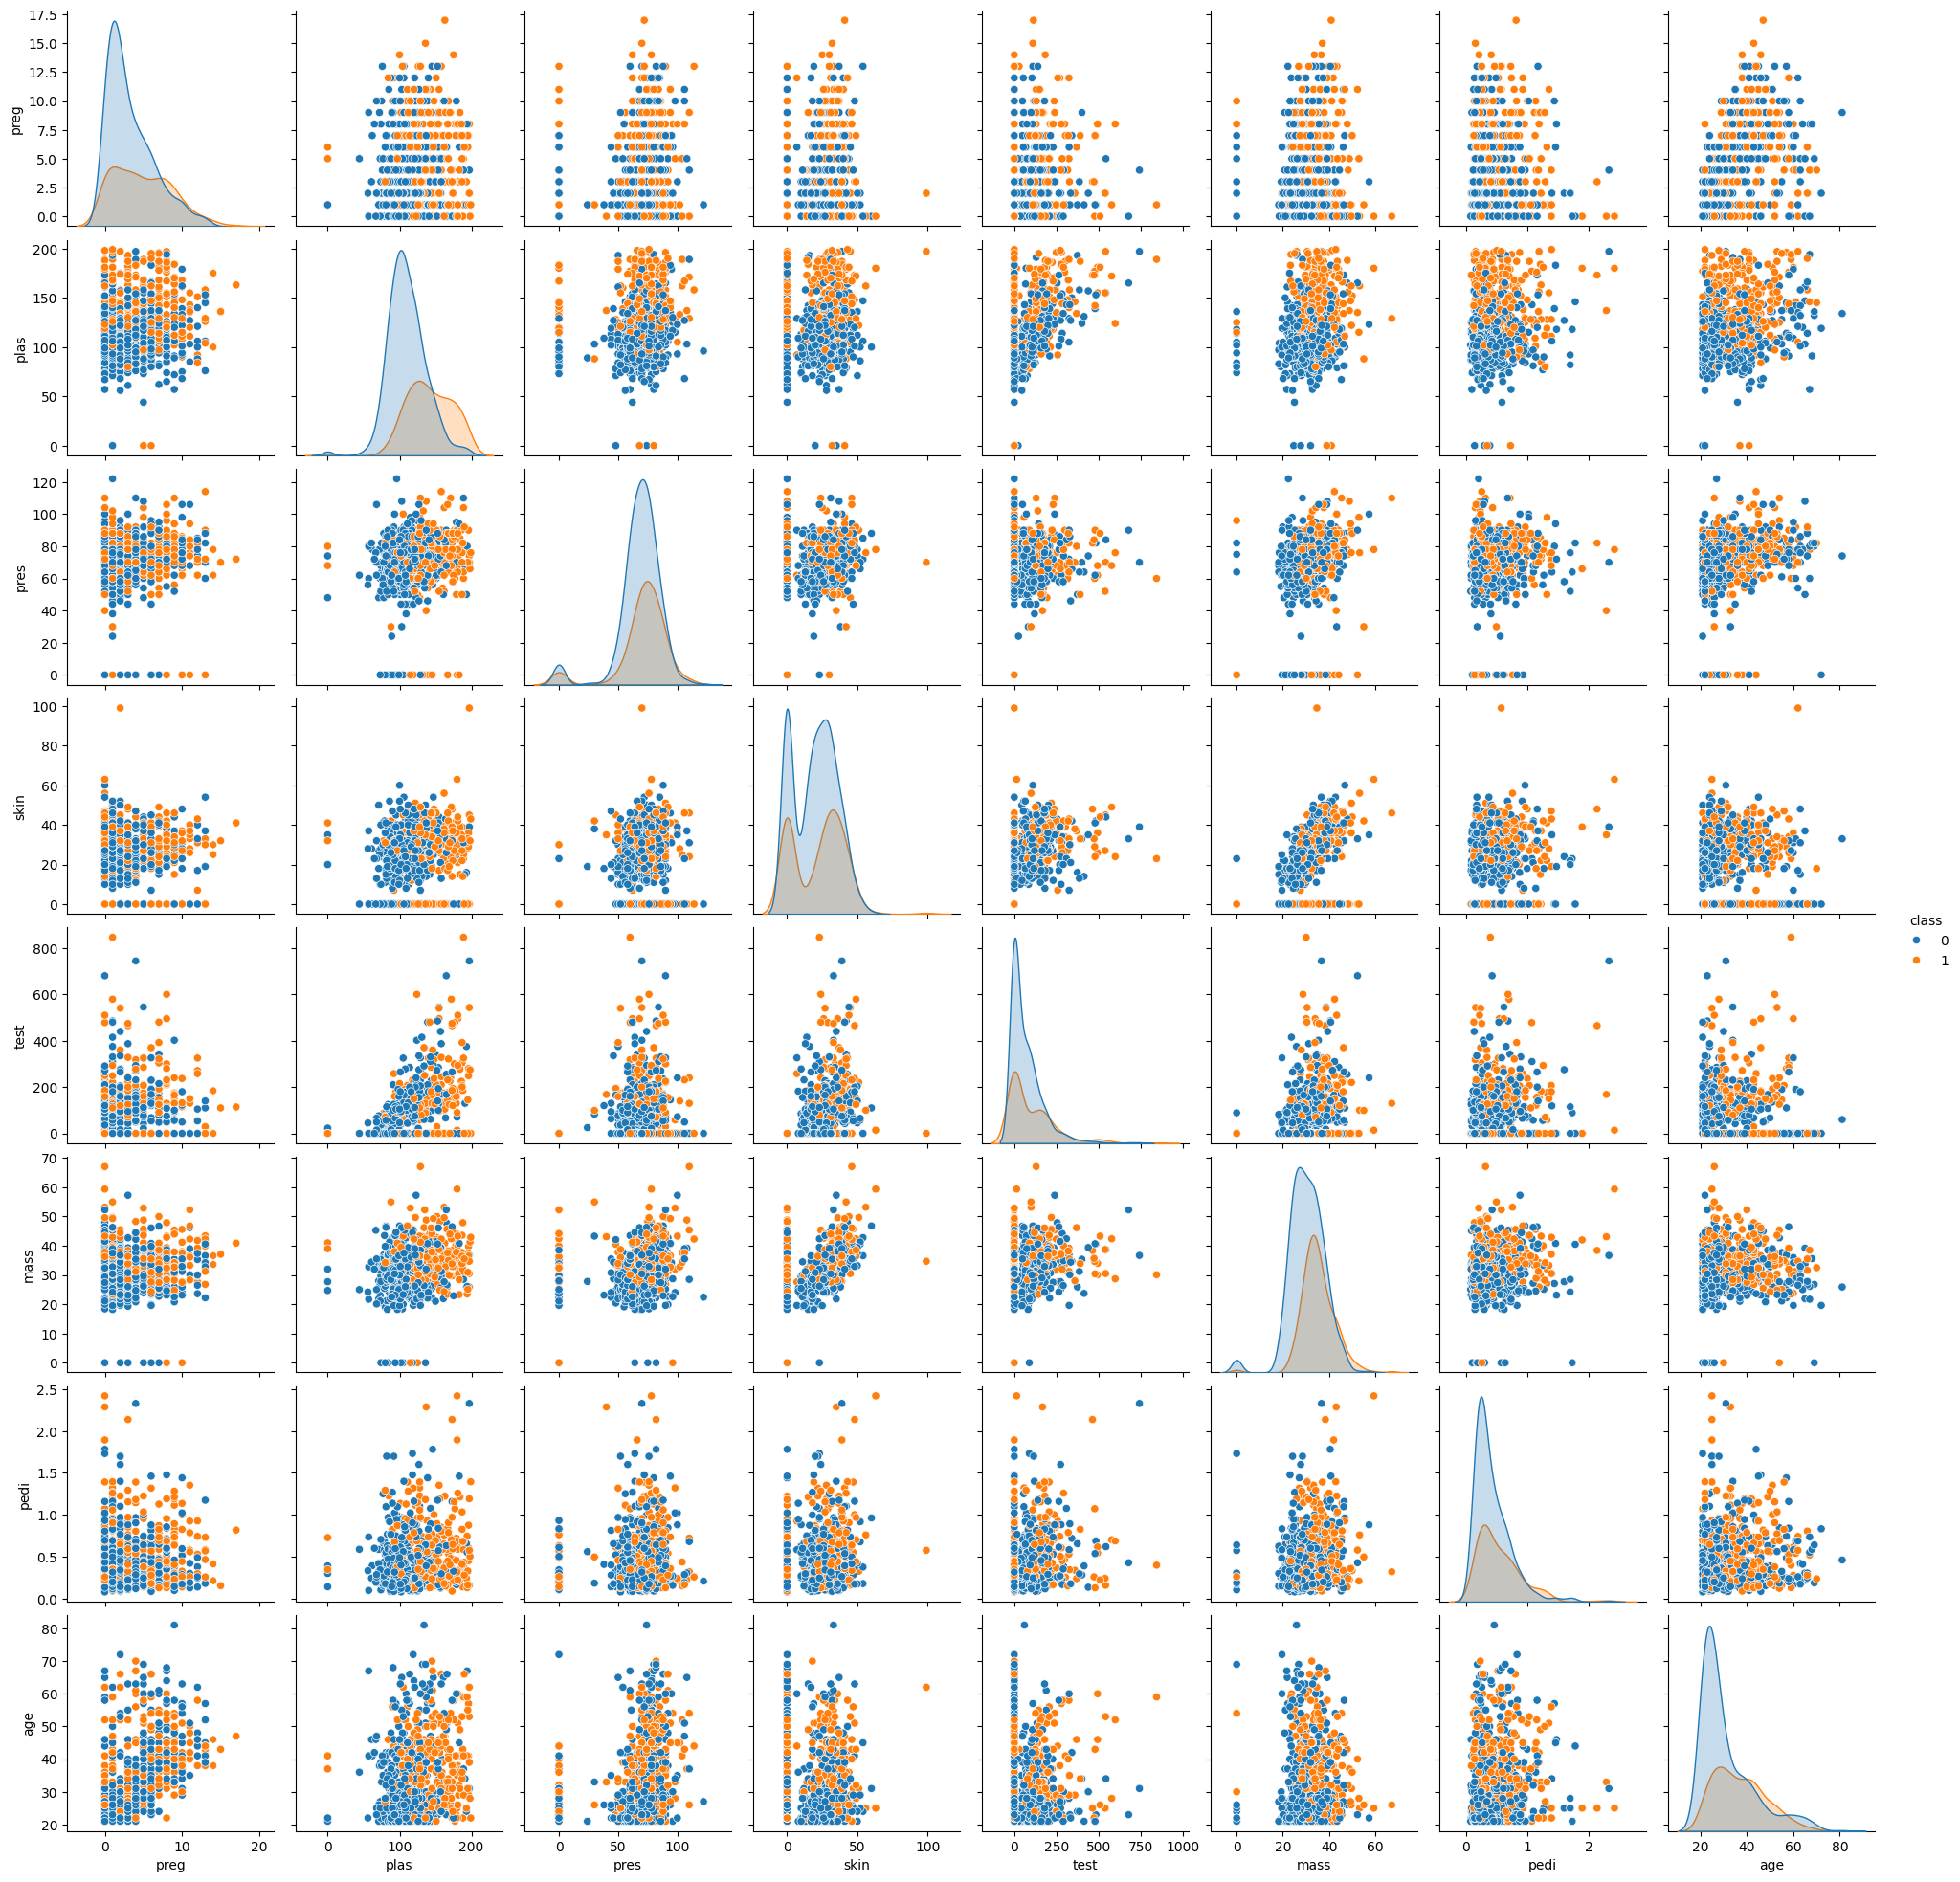

In [38]:
sns.pairplot(df, hue='class')

generamos el modelo para arbol de decisión

In [52]:
x = df_02.drop(['class'], axis=1)
y = df_02['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)
tree = DecisionTreeClassifier(max_depth = 2, random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [53]:
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)

analizamos las metricas

In [54]:
#para ver  train vs pred
print(metrics.accuracy_score(y_train,y_train_pred_tree))
#para ver test  vs pred
print(metrics.accuracy_score(y_test, y_test_pred_tree ))

0.765089722675367
0.7532467532467533


In [55]:
metrics.confusion_matrix(y_test, y_test_pred_tree)

array([[78, 19],
       [19, 38]])

las variables relevantes para el test son


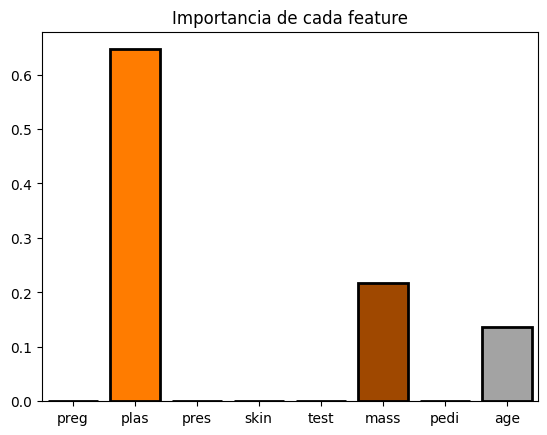

In [56]:
#veamos los importances
print("las variables relevantes para el test son")
importances = tree.feature_importances_
colums = x.columns
df_importances = pd.DataFrame([importances], columns=colums)
sns.barplot(df_importances, palette = 'bright', saturation= 2.0, edgecolor = 'black', linewidth= 2)
plt.title('Importancia de cada feature')
plt.show()

generamos el modelo para random_forest

In [84]:
ran_for = RandomForestClassifier(n_estimators=10, random_state=42)

In [85]:
ran_for.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [86]:
y_train_pred_ran_for = ran_for.predict(x_train)
y_test_pred_ran_for = ran_for.predict(x_test)

analizamos las metricas

In [87]:
#para ver  train vs pred
print(metrics.accuracy_score(y_train,y_train_pred_ran_for))
#para ver test  vs pred
print(metrics.accuracy_score(y_test, y_test_pred_ran_for ))

0.9885807504078303
0.7532467532467533


In [88]:
metrics.confusion_matrix(y_test, y_test_pred_ran_for)

array([[82, 15],
       [23, 34]])

In [89]:
metrics.confusion_matrix(y_train,y_train_pred_ran_for)

array([[403,   0],
       [  7, 203]])

las variables relevantes para el test son


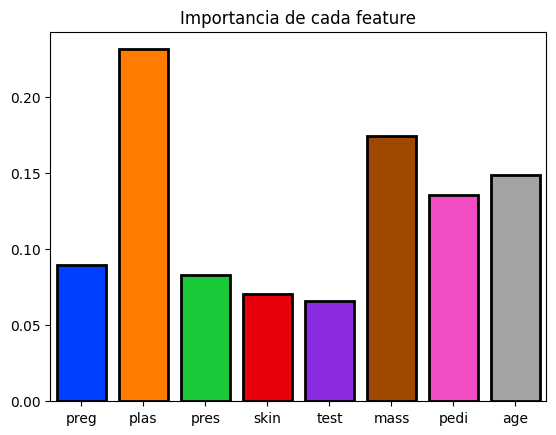

In [90]:
#veamos los importances
print("las variables relevantes para el test son")
importances_ran = ran_for.feature_importances_
colums = x.columns
df_importances_ran = pd.DataFrame([importances_ran], columns=colums)
sns.barplot(df_importances_ran, palette = 'bright', saturation= 2.0, edgecolor = 'black', linewidth= 2)
plt.title('Importancia de cada feature')
plt.show()